# import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Suppress all warnings (not recommended)
warnings.filterwarnings("ignore")


In [2]:
train=pd.read_csv("train.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Pre-processing

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()/train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## handle Missing value

In [6]:
train["Age"]=train["Age"].fillna(method="backfill")


In [7]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.00,0,0,2620,7.2250,NaN,C
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.00,0,0,349241,7.8958,NaN,C
669,670,1,1,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",female,40.00,1,0,19996,52.0000,C126,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.00,0,0,367231,7.7500,NaN,Q
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
722,723,0,2,"Gillespie, Mr. William Henry",male,34.00,0,0,12233,13.0000,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.00,0,0,347081,7.7500,NaN,S
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.00,0,0,347078,7.7500,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,54.00,0,0,2627,14.4583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


In [8]:
train.isnull().sum()/train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
train.duplicated().sum()

0

## Drop columns not need

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train=train.drop(columns="Name",axis=1)
#train=train.drop(columns="Embarked",axis=1)
train=train.drop(columns="Cabin",axis=1)

In [12]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,26.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


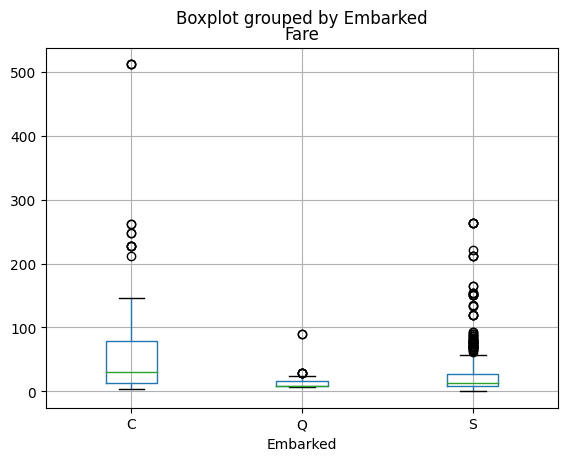

In [13]:
train.boxplot(column = "Fare",by = "Embarked")
plt.show()

<AxesSubplot:>

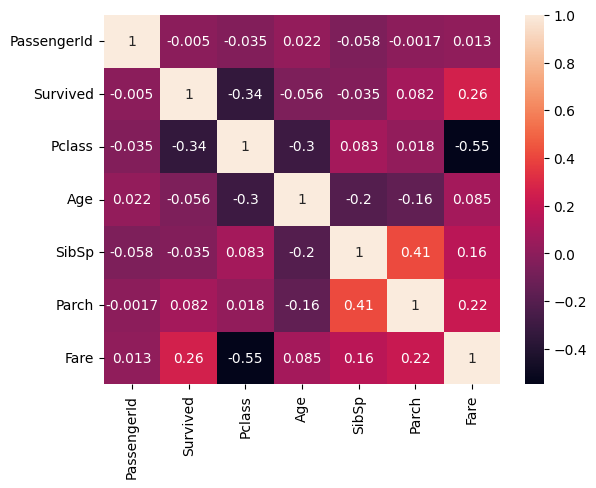

In [14]:
sns.heatmap(train.corr() , annot = True)

# Visualization & EDA

**Survived**

In [15]:
train.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:ylabel='Survived'>

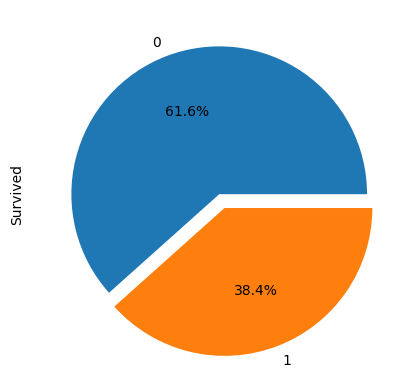

In [16]:
train['Survived'].value_counts().plot.pie(autopct="%1.1f%%",explode=[0,0.1])

Almost 62% people died in the horrible incident.

<AxesSubplot:ylabel='Survived'>

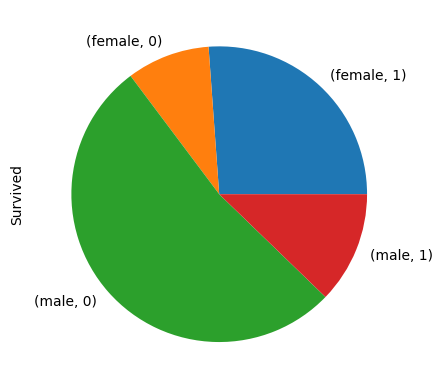

In [17]:
train.groupby(["Sex"])["Survived"].value_counts().plot(kind="pie")

## Age

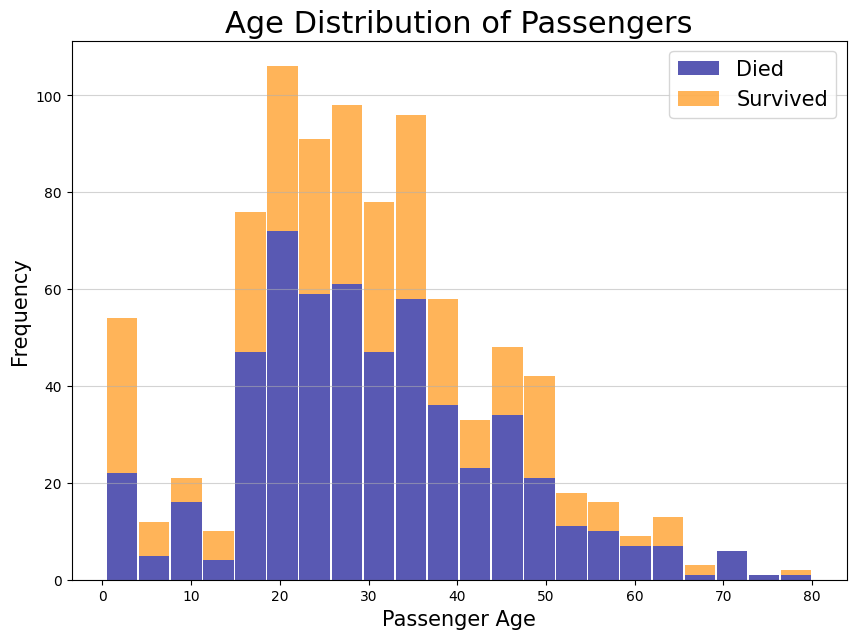

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
age_died = train[train['Survived']==0]['Age']
age_survive = train[train['Survived']==1]['Age']
n, bins, patches = plt.hist(x = [age_died, age_survive],
                            stacked = True, bins='auto',
                            color=['darkblue', 'darkorange'],
                            alpha=0.65, rwidth=0.95)
plt.grid(axis='y', alpha=0.55)

plt.xlabel('Passenger Age', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Age Distribution of Passengers', fontsize = 22)
plt.legend(['Died','Survived'], fontsize = 15);

## **Fare**

<AxesSubplot:xlabel='Fare', ylabel='Density'>

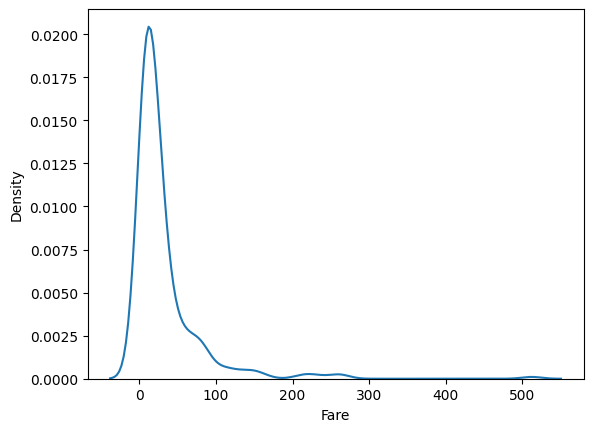

In [19]:
sns.kdeplot(train['Fare'])

## **Analysis on Numerical Columns ('Age','Fare')**

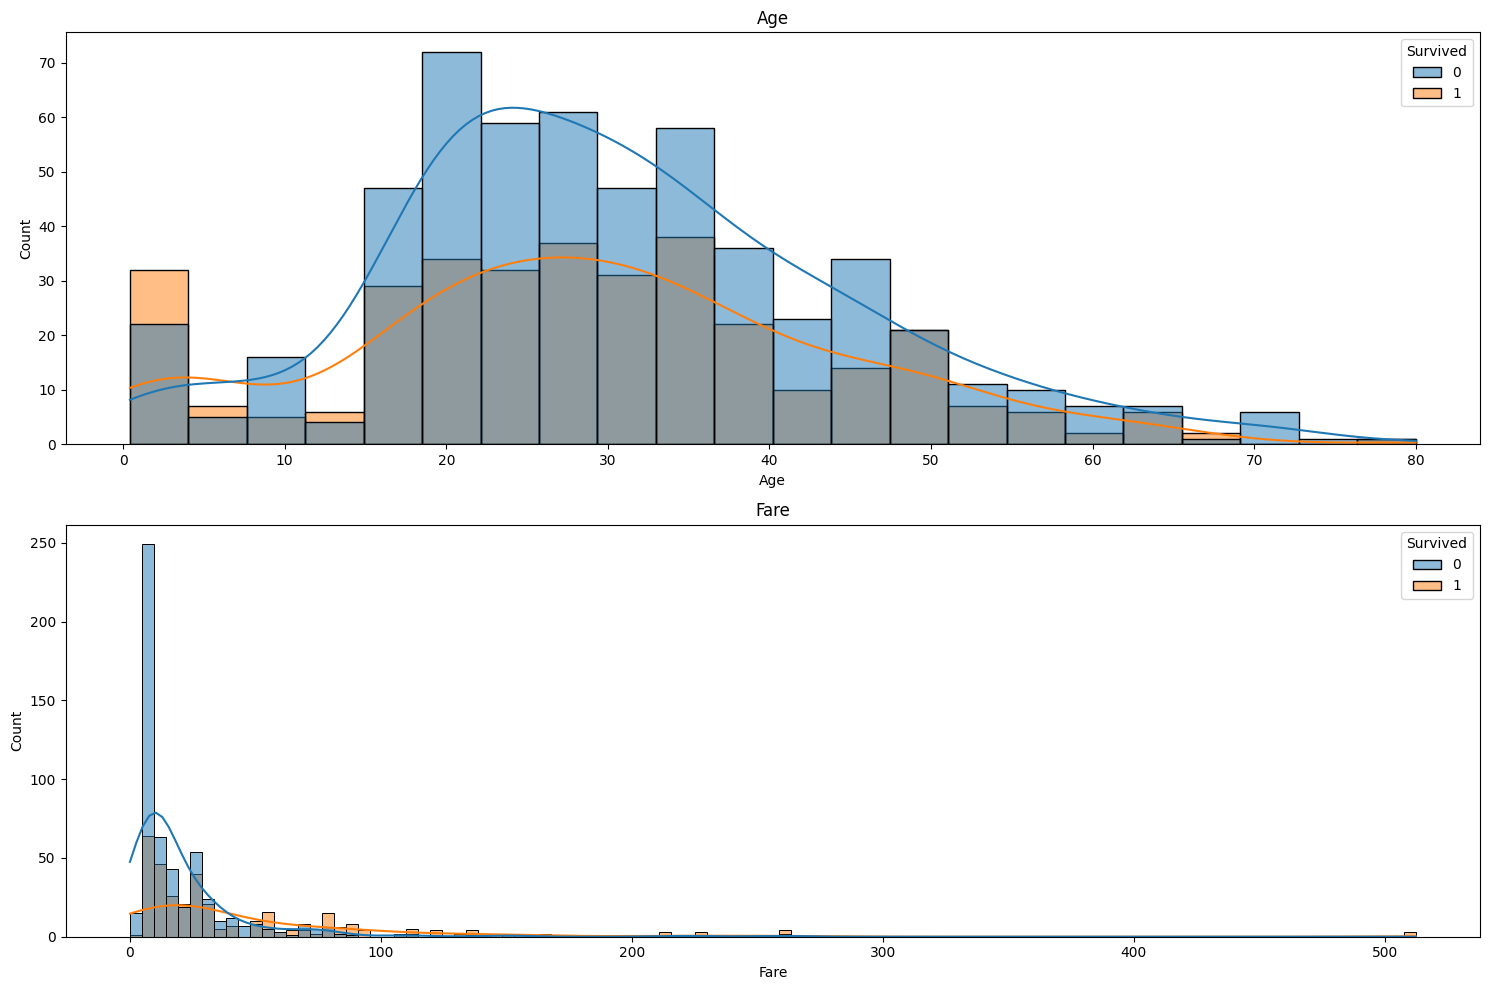

In [20]:
num_col = ['Age','Fare']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,10))

for i, col in enumerate(num_col):
    sns.histplot(data=train, x=col,hue='Survived', ax=axes[i],kde=True)
    axes[i].set_title(col)

fig.tight_layout()
plt.show()

In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.870561,14.597668,0.42,21.0000,29.0000,39.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


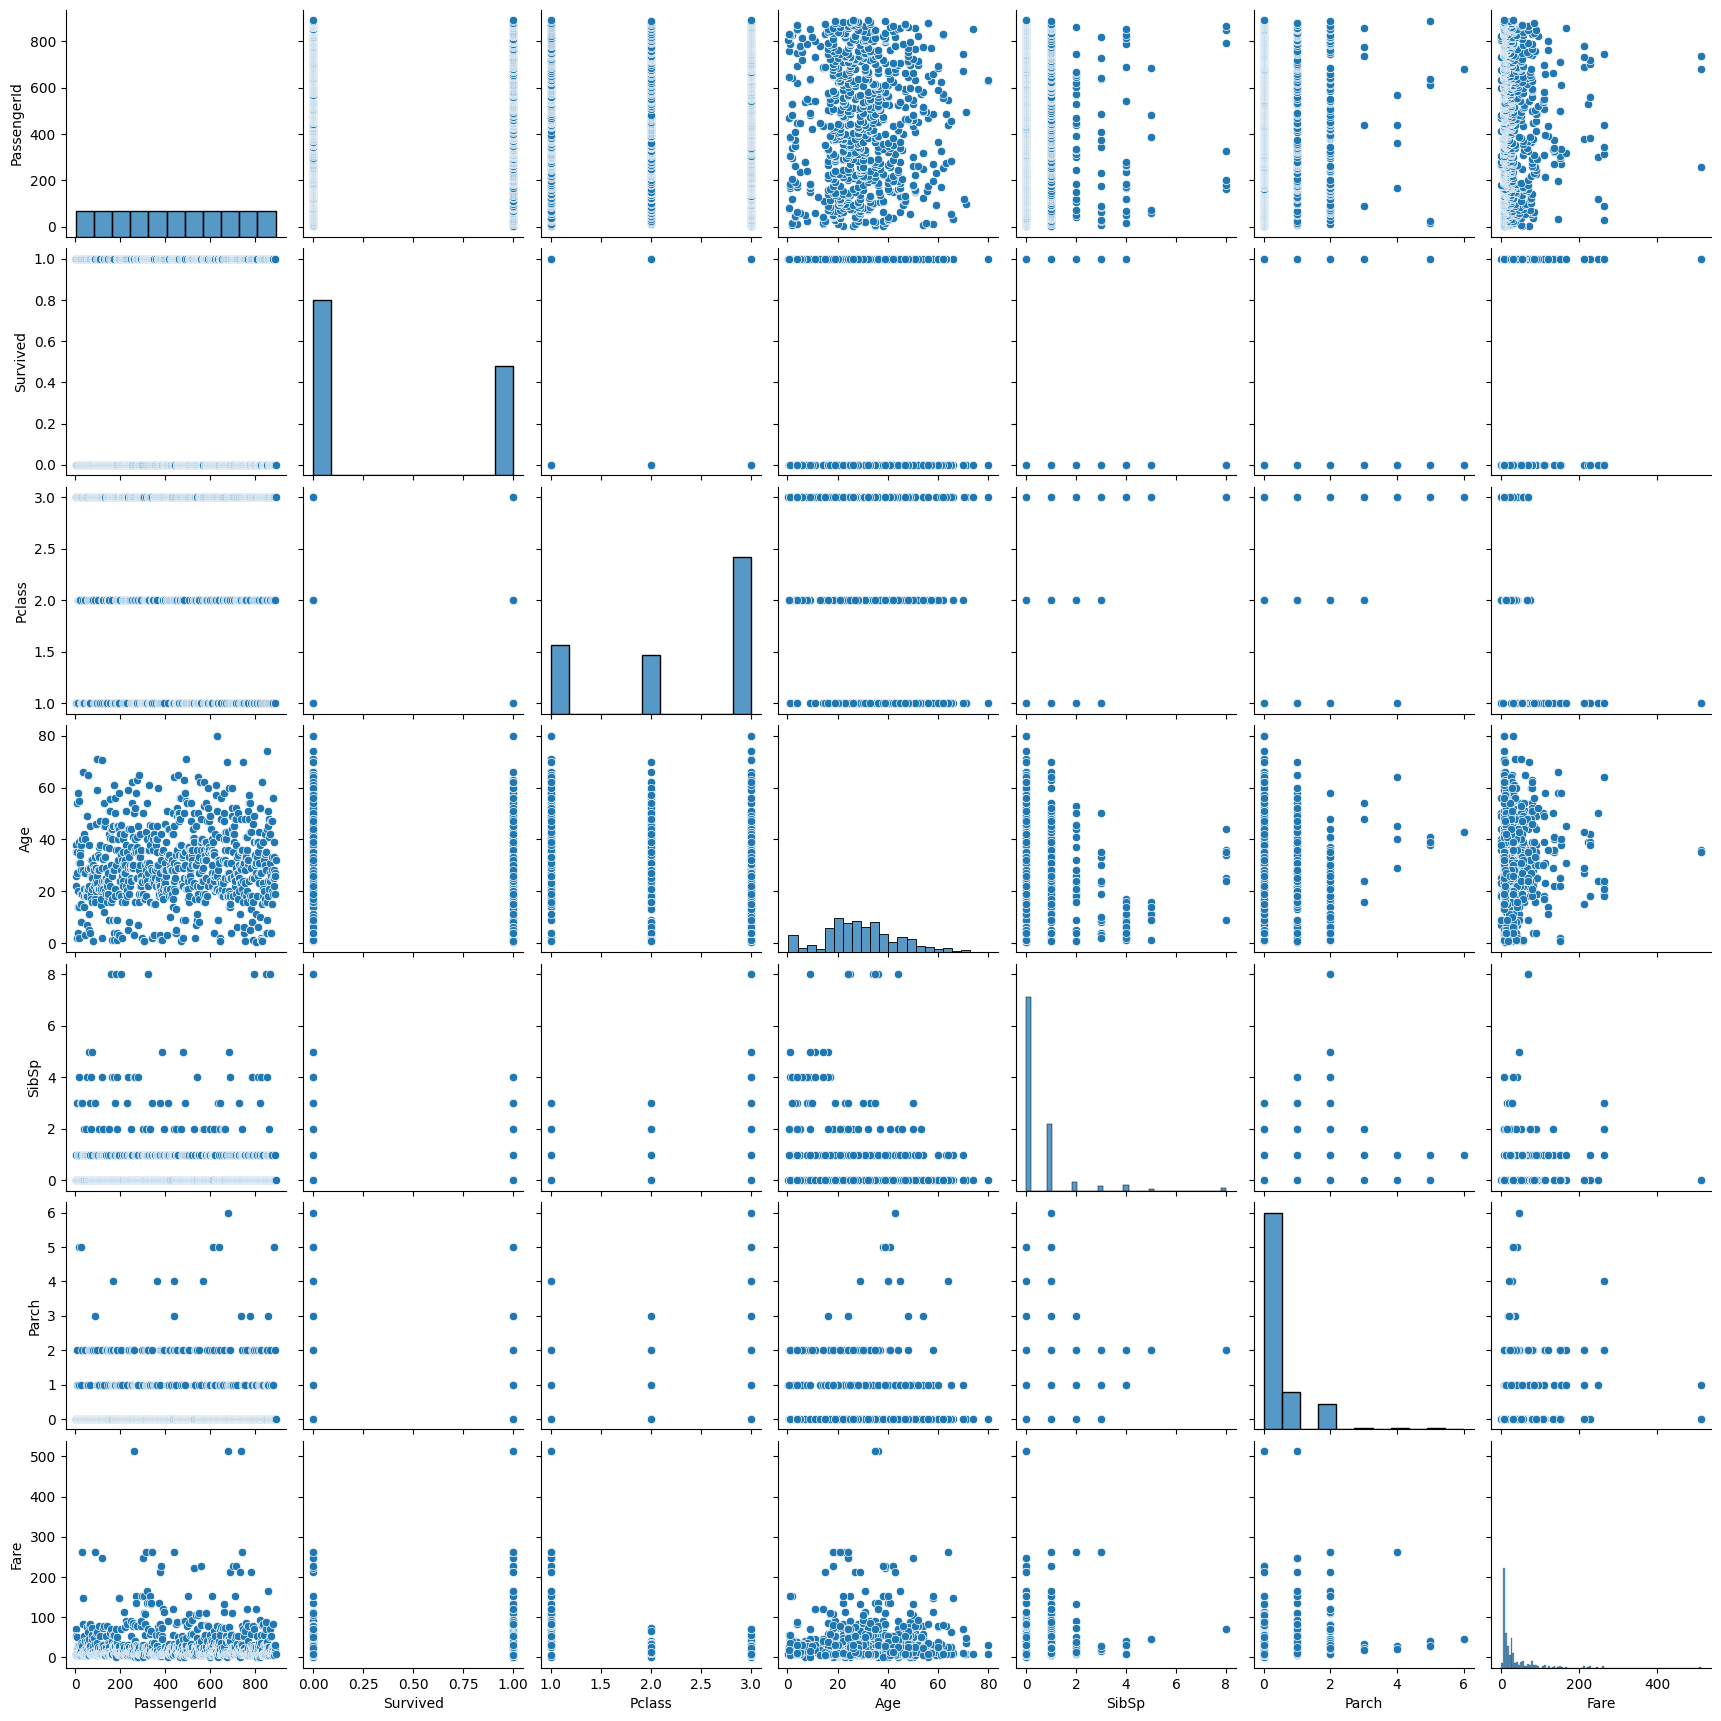

In [22]:
sns.pairplot(train)

## Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    train[column] = label_encoder.fit_transform(train[column])

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int32  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB


# Training ML Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report


## Split Data

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
x=train.drop(labels="Survived",axis=1)
y=train["Survived"]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= 0.25 , random_state= 42)

## Data scaling with standerdscaler

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc=StandardScaler()

In [32]:
x_train_scaler=sc.fit_transform(x_train)

In [33]:
x_test_scaler=sc.fit_transform(x_test)

# **KNN**

In [34]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [35]:
print(knn.score(x_train_scaler,y_train))
print(knn.score(x_test_scaler,y_test))

0.624251497005988
0.6053811659192825


In [36]:
y_pred_knn=knn.predict(x_test_scaler)
print("acuuricy score: ", accuracy_score(y_pred_knn,y_test))
print(confusion_matrix(y_pred_knn,y_test))

acuuricy score:  0.6053811659192825
[[134  88]
 [  0   1]]


# **Logistic Regression**

In [37]:
Lr=LogisticRegression(C=0.1)

In [38]:
Lr.fit(x_train_scaler,y_train)

LogisticRegression(C=0.1)

In [39]:
y_pred_1=Lr.predict(x_test_scaler)
y_pred_1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [40]:
print(Lr.score(x_train_scaler,y_train))
print(Lr.score(x_test_scaler,y_test))

0.7994011976047904
0.8071748878923767


In [41]:
print("acuuricy score: ", accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))

acuuricy score:  0.8071748878923767
[[119  28]
 [ 15  61]]


# **Decision Tree**

## Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
model=DecisionTreeClassifier(max_depth=5,max_features=7)
model.fit(x_train, y_train)
prediction4=model.predict(x_test)
print('The accuracy of the Decision Tree is',accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.7982062780269058


## **Random Forest**

In [44]:
rf = RandomForestClassifier(n_estimators= 19 , max_depth= 6 , max_features= 8)

In [45]:
rf.fit(x_train_scaler, y_train)

RandomForestClassifier(max_depth=6, max_features=8, n_estimators=19)

In [46]:
print (rf.score(x_train_scaler, y_train))
print (rf.score(x_test_scaler, y_test))


0.9086826347305389
0.8340807174887892


In [47]:
y_pred_rf=rf.predict(x_test_scaler)
print("acurracy score: ", accuracy_score(y_pred_rf,y_test))
print(confusion_matrix(y_pred_rf,y_test))

acurracy score:  0.8340807174887892
[[123  26]
 [ 11  63]]


In [48]:
param_grid={"n_estimators":np.arange(10,20),"max_depth":[4,5,6],'max_features':[8,7,9]}
model=RandomForestClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)
grid_res=grid.fit(x_train_scaler,y_train)
print ("Best: %f using %s" %(grid_res.best_score_ , grid_res.best_params_))

Best: 0.823353 using {'max_depth': 4, 'max_features': 7, 'n_estimators': 12}


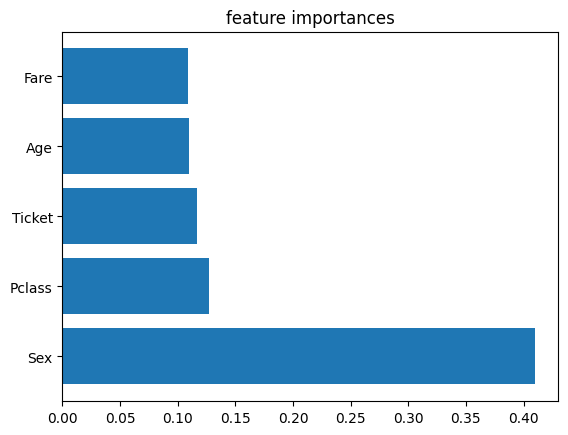

In [49]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin']

f_importances(abs(rf.feature_importances_), features_names, top=5)


## **model XGboost**

In [50]:
from xgboost import XGBClassifier

xgb=XGBClassifier(missing=10 , max_depth=4,  n_estimators=6,learning_rate=0.4)


In [51]:
xgb.fit(x_train_scaler,y_train)
print (xgb.score(x_train_scaler, y_train))
print (xgb.score(x_test_scaler, y_test))

0.8727544910179641
0.820627802690583


In [52]:
y_pred_xgb=xgb.predict(x_test_scaler)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       134
           1       0.82      0.71      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



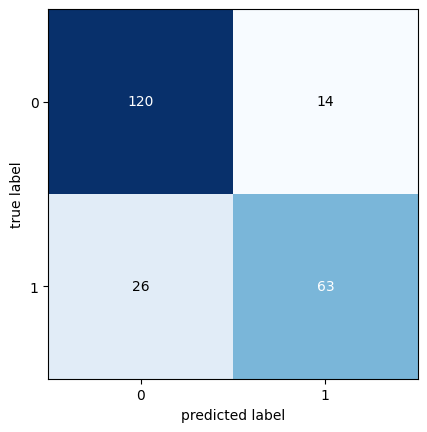

In [53]:
con = confusion_matrix(y_test , xgb.predict(x_test_scaler) )
con
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(con )

print (classification_report(y_test , xgb.predict(x_test_scaler)))

In [54]:
print("acuuricy score: ", accuracy_score(y_pred_xgb,y_test))
print(confusion_matrix(y_pred_xgb,y_test))

acuuricy score:  0.820627802690583
[[120  26]
 [ 14  63]]


# **Voting**

In [55]:
clf1=LogisticRegression()
clf2=XGBClassifier(missing=10 , max_depth=4,  n_estimators=6,learning_rate=0.4)
clf3= DecisionTreeClassifier(    max_depth= 3 , max_features= 4)
clf4=KNeighborsClassifier(n_neighbors=10)
clf5=RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)

In [56]:
v_clf=VotingClassifier(estimators=[('LR',clf1),('xgb',clf2),('DT',clf3),('knn',clf4),('rf',clf5)],voting ="hard")

## Cross Validation

In [57]:
from sklearn.model_selection import KFold , cross_val_score

In [58]:
K_fold = KFold(n_splits= 3 , shuffle  = True ,random_state= 42)
scoring = "accuracy"
score = cross_val_score(model ,x_train_scaler, y_train, cv = K_fold , scoring= scoring)
print (score)

[0.8161435  0.83856502 0.7972973 ]


# **Report**

In [59]:
# XGB
cr = classification_report(y_test, y_pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       134
           1       0.82      0.71      0.76        89

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.82       223



In [60]:
# rf
cr = classification_report(y_test, y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       134
           1       0.85      0.71      0.77        89

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [61]:
# Logistic Regression
cr = classification_report(y_test, y_pred_1)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       134
           1       0.80      0.69      0.74        89

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.81      0.80       223



**XGB is best report accuracy 81% and autoML the same on**